In [4]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d as plt3d
import numpy as np
from scipy.fft import fft, ifft, fftfreq

In [42]:
def get_data(int_time_step, final_time_step, particles):
    t = int_time_step #current time step
    p = particles
    ts = final_time_step - int_time_step + 1
    x_data = np.zeros((ts, p)) #, 2)) # index is (time steps, particles, z-coord 1st "layer" is pos, 2nd is dist)
    y_data = np.zeros((ts, p)) #, 2)) 
    z_data = np.zeros((ts, p)) # 2)) 
    t_step = np.array(range(ts)) #creates array the length of time steps 
    p_id = np.zeros((ts, p))
    while t <= (int_time_step + ts-1):
        amrex_ds = AMReXDataset('cplt000000'+str(t))
        ad = amrex_ds.all_data()
#         raw_pos_x = ad['particles', 'particle_position_x'].v
#         x_data[t-int_time_step,:p,0] = (raw_pos_x)
#         raw_pos_y = ad['particles', 'particle_position_y'].v
#         y_data[t-int_time_step,:p,0] = (raw_pos_y)
#         raw_pos_z = ad['particles', 'particle_position_z'].v
#         z_data[t-int_time_step,:p,0] = (raw_pos_z)
        raw_dist_x = ad['particles', 'particle_ax'].v
        x_data[t-int_time_step,:p] = (raw_dist_x)
        raw_dist_y = ad['particles', 'particle_ay'].v
        y_data[t-int_time_step,:p] = (raw_dist_y)
        raw_dist_z = ad['particles', 'particle_az'].v
        z_data[t-int_time_step,:p] = (raw_dist_z)
        raw_id = ad['particles', 'particle_id'].v
        p_id[t-int_time_step,:p] = (raw_id)
        t = t+1
    return x_data, y_data, z_data, t_step, p_id

In [43]:
(x_data, y_data, z_data, t_step, p_id) = get_data(101, 700, 1000)

yt : [INFO     ] 2022-06-23 10:56:48,586 Parameters: current_time              = 3.2221900000000014e-13
yt : [INFO     ] 2022-06-23 10:56:48,587 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:56:48,589 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:56:48,590 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:56:50,887 Parameters: current_time              = 4.2221900000000017e-13
yt : [INFO     ] 2022-06-23 10:56:50,888 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:56:50,890 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:56:50,891 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:56:52,992 Parameters: current_time              = 5.222190000000002e-13
yt : [INFO     ] 2022-06-23 10:56:52,993 Parameters: domain_dimensions         = [128 128

yt : [INFO     ] 2022-06-23 10:57:33,339 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:57:35,426 Parameters: current_time              = 2.422219e-12
yt : [INFO     ] 2022-06-23 10:57:35,427 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:57:35,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:57:35,430 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:57:37,550 Parameters: current_time              = 2.522219e-12
yt : [INFO     ] 2022-06-23 10:57:37,551 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:57:37,552 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:57:37,553 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:57:39,768 Parameters: current_time              = 2.622219e-12
yt : 

yt : [INFO     ] 2022-06-23 10:58:19,434 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:58:19,436 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:58:21,581 Parameters: current_time              = 4.522219e-12
yt : [INFO     ] 2022-06-23 10:58:21,582 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:58:21,583 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:58:21,586 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:58:23,889 Parameters: current_time              = 4.622219e-12
yt : [INFO     ] 2022-06-23 10:58:23,890 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:58:23,891 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:58:23,892 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [I

yt : [INFO     ] 2022-06-23 10:59:05,310 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:59:05,311 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:59:05,313 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:59:07,654 Parameters: current_time              = 6.6222189999999995e-12
yt : [INFO     ] 2022-06-23 10:59:07,655 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:59:07,656 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:59:07,657 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:59:09,799 Parameters: current_time              = 6.7222189999999994e-12
yt : [INFO     ] 2022-06-23 10:59:09,800 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:59:09,801 Parameters: domain_left_edge          = [0. 0. 0.]
yt : 

yt : [INFO     ] 2022-06-23 10:59:51,565 Parameters: current_time              = 8.622219e-12
yt : [INFO     ] 2022-06-23 10:59:51,567 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:59:51,568 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:59:51,569 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:59:53,680 Parameters: current_time              = 8.722219e-12
yt : [INFO     ] 2022-06-23 10:59:53,682 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 10:59:53,683 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 10:59:53,686 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 10:59:55,930 Parameters: current_time              = 8.822219e-12
yt : [INFO     ] 2022-06-23 10:59:55,932 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-0

yt : [INFO     ] 2022-06-23 11:00:37,864 Parameters: current_time              = 1.0722219e-11
yt : [INFO     ] 2022-06-23 11:00:37,865 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:00:37,866 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:00:37,868 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:00:40,065 Parameters: current_time              = 1.0822219e-11
yt : [INFO     ] 2022-06-23 11:00:40,066 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:00:40,067 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:00:40,069 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:00:42,120 Parameters: current_time              = 1.0922219e-11
yt : [INFO     ] 2022-06-23 11:00:42,122 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 202

yt : [INFO     ] 2022-06-23 11:01:21,764 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:01:21,766 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:01:23,966 Parameters: current_time              = 1.2822218999999999e-11
yt : [INFO     ] 2022-06-23 11:01:23,968 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:01:23,969 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:01:23,970 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:01:26,128 Parameters: current_time              = 1.2922218999999999e-11
yt : [INFO     ] 2022-06-23 11:01:26,129 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:01:26,131 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:01:26,132 Parameters: domain_right_edge         = [1.306e-06 1.306e-0

yt : [INFO     ] 2022-06-23 11:02:08,141 Parameters: current_time              = 1.4822219000000002e-11
yt : [INFO     ] 2022-06-23 11:02:08,143 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:02:08,144 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:02:08,145 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:02:10,285 Parameters: current_time              = 1.4922219000000003e-11
yt : [INFO     ] 2022-06-23 11:02:10,286 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:02:10,287 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:02:10,288 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:02:12,461 Parameters: current_time              = 1.5022219000000005e-11
yt : [INFO     ] 2022-06-23 11:02:12,463 Parameters: domain_dimensions         = [128 12

yt : [INFO     ] 2022-06-23 11:02:52,278 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:02:52,280 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:02:54,402 Parameters: current_time              = 1.6922219000000035e-11
yt : [INFO     ] 2022-06-23 11:02:54,403 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:02:54,404 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:02:54,406 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:02:56,456 Parameters: current_time              = 1.7022219000000037e-11
yt : [INFO     ] 2022-06-23 11:02:56,457 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:02:56,458 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:02:56,459 Parameters: domain_right_edge         = [1.306e-06 1.306e-0

yt : [INFO     ] 2022-06-23 11:03:38,195 Parameters: current_time              = 1.8922219000000067e-11
yt : [INFO     ] 2022-06-23 11:03:38,196 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:03:38,197 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:03:38,198 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:03:40,523 Parameters: current_time              = 1.902221900000007e-11
yt : [INFO     ] 2022-06-23 11:03:40,524 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:03:40,525 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:03:40,526 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:03:42,701 Parameters: current_time              = 1.912221900000007e-11
yt : [INFO     ] 2022-06-23 11:03:42,703 Parameters: domain_dimensions         = [128 128 

yt : [INFO     ] 2022-06-23 11:04:21,949 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:04:21,950 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:04:24,163 Parameters: current_time              = 2.10222190000001e-11
yt : [INFO     ] 2022-06-23 11:04:24,164 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:04:24,165 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:04:24,166 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:04:26,399 Parameters: current_time              = 2.1122219000000102e-11
yt : [INFO     ] 2022-06-23 11:04:26,401 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:04:26,402 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:04:26,403 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 

yt : [INFO     ] 2022-06-23 11:05:08,042 Parameters: current_time              = 2.3022219000000132e-11
yt : [INFO     ] 2022-06-23 11:05:08,043 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:05:08,044 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:05:08,045 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:05:10,325 Parameters: current_time              = 2.3122219000000134e-11
yt : [INFO     ] 2022-06-23 11:05:10,326 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:05:10,327 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:05:10,328 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:05:12,356 Parameters: current_time              = 2.3222219000000136e-11
yt : [INFO     ] 2022-06-23 11:05:12,357 Parameters: domain_dimensions         = [128 12

yt : [INFO     ] 2022-06-23 11:05:51,753 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:05:51,755 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:05:54,106 Parameters: current_time              = 2.5122219000000166e-11
yt : [INFO     ] 2022-06-23 11:05:54,107 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:05:54,108 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:05:54,110 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:05:56,265 Parameters: current_time              = 2.5222219000000167e-11
yt : [INFO     ] 2022-06-23 11:05:56,266 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:05:56,268 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:05:56,269 Parameters: domain_right_edge         = [1.306e-06 1.306e-0

yt : [INFO     ] 2022-06-23 11:06:38,223 Parameters: current_time              = 2.7122219000000198e-11
yt : [INFO     ] 2022-06-23 11:06:38,224 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:06:38,225 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:06:38,227 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:06:40,391 Parameters: current_time              = 2.72222190000002e-11
yt : [INFO     ] 2022-06-23 11:06:40,392 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:06:40,393 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:06:40,395 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:06:42,615 Parameters: current_time              = 2.73222190000002e-11
yt : [INFO     ] 2022-06-23 11:06:42,616 Parameters: domain_dimensions         = [128 128  6

yt : [INFO     ] 2022-06-23 11:07:22,507 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:07:22,510 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:07:24,840 Parameters: current_time              = 2.9222219000000225e-11
yt : [INFO     ] 2022-06-23 11:07:24,841 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:07:24,842 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:07:24,844 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:07:27,049 Parameters: current_time              = 2.932221900000022e-11
yt : [INFO     ] 2022-06-23 11:07:27,050 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:07:27,051 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:07:27,052 Parameters: domain_right_edge         = [1.306e-06 1.306e-06

yt : [INFO     ] 2022-06-23 11:08:08,803 Parameters: current_time              = 3.122221900000019e-11
yt : [INFO     ] 2022-06-23 11:08:08,804 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:08:08,805 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:08:08,806 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:08:10,898 Parameters: current_time              = 3.132221900000019e-11
yt : [INFO     ] 2022-06-23 11:08:10,899 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:08:10,900 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:08:10,901 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:08:13,017 Parameters: current_time              = 3.142221900000019e-11
yt : [INFO     ] 2022-06-23 11:08:13,018 Parameters: domain_dimensions         = [128 128  

yt : [INFO     ] 2022-06-23 11:08:52,874 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:08:52,875 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:08:55,085 Parameters: current_time              = 3.332221900000016e-11
yt : [INFO     ] 2022-06-23 11:08:55,086 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:08:55,087 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:08:55,090 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:08:57,248 Parameters: current_time              = 3.3422219000000156e-11
yt : [INFO     ] 2022-06-23 11:08:57,249 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:08:57,251 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:08:57,252 Parameters: domain_right_edge         = [1.306e-06 1.306e-06

yt : [INFO     ] 2022-06-23 11:09:39,247 Parameters: current_time              = 3.5322219000000125e-11
yt : [INFO     ] 2022-06-23 11:09:39,249 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:09:39,250 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:09:39,251 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:09:41,444 Parameters: current_time              = 3.542221900000012e-11
yt : [INFO     ] 2022-06-23 11:09:41,445 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:09:41,446 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:09:41,447 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:09:43,581 Parameters: current_time              = 3.552221900000012e-11
yt : [INFO     ] 2022-06-23 11:09:43,582 Parameters: domain_dimensions         = [128 128 

yt : [INFO     ] 2022-06-23 11:10:23,473 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:10:23,474 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:10:25,607 Parameters: current_time              = 3.742221900000009e-11
yt : [INFO     ] 2022-06-23 11:10:25,609 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:10:25,610 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:10:25,611 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:10:27,747 Parameters: current_time              = 3.752221900000009e-11
yt : [INFO     ] 2022-06-23 11:10:27,748 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:10:27,749 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:10:27,750 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 

yt : [INFO     ] 2022-06-23 11:11:10,205 Parameters: current_time              = 3.942221900000006e-11
yt : [INFO     ] 2022-06-23 11:11:10,206 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:11:10,207 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:11:10,209 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:11:12,510 Parameters: current_time              = 3.9522219000000056e-11
yt : [INFO     ] 2022-06-23 11:11:12,511 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:11:12,512 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:11:12,514 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:11:14,646 Parameters: current_time              = 3.9622219000000054e-11
yt : [INFO     ] 2022-06-23 11:11:14,647 Parameters: domain_dimensions         = [128 128

yt : [INFO     ] 2022-06-23 11:11:54,005 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:11:54,007 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:11:56,277 Parameters: current_time              = 4.152221900000002e-11
yt : [INFO     ] 2022-06-23 11:11:56,278 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:11:56,279 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:11:56,281 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:11:58,417 Parameters: current_time              = 4.162221900000002e-11
yt : [INFO     ] 2022-06-23 11:11:58,419 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:11:58,420 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:11:58,421 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 

yt : [INFO     ] 2022-06-23 11:12:40,534 Parameters: current_time              = 4.352221899999999e-11
yt : [INFO     ] 2022-06-23 11:12:40,535 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:12:40,537 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:12:40,538 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:12:42,642 Parameters: current_time              = 4.362221899999999e-11
yt : [INFO     ] 2022-06-23 11:12:42,643 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:12:42,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:12:42,645 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:12:44,976 Parameters: current_time              = 4.372221899999999e-11
yt : [INFO     ] 2022-06-23 11:12:44,977 Parameters: domain_dimensions         = [128 128  

yt : [INFO     ] 2022-06-23 11:13:24,797 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:13:24,798 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:13:27,098 Parameters: current_time              = 4.5622218999999956e-11
yt : [INFO     ] 2022-06-23 11:13:27,099 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:13:27,100 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:13:27,102 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:13:29,076 Parameters: current_time              = 4.5722218999999954e-11
yt : [INFO     ] 2022-06-23 11:13:29,077 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:13:29,078 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:13:29,080 Parameters: domain_right_edge         = [1.306e-06 1.306e-0

yt : [INFO     ] 2022-06-23 11:14:11,192 Parameters: current_time              = 4.7622218999999923e-11
yt : [INFO     ] 2022-06-23 11:14:11,193 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:14:11,194 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:14:11,195 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:14:13,435 Parameters: current_time              = 4.772221899999992e-11
yt : [INFO     ] 2022-06-23 11:14:13,436 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:14:13,437 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:14:13,439 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:14:15,594 Parameters: current_time              = 4.782221899999992e-11
yt : [INFO     ] 2022-06-23 11:14:15,595 Parameters: domain_dimensions         = [128 128 

yt : [INFO     ] 2022-06-23 11:14:55,054 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:14:55,055 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:14:57,189 Parameters: current_time              = 4.972221899999989e-11
yt : [INFO     ] 2022-06-23 11:14:57,190 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:14:57,191 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:14:57,194 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:14:59,557 Parameters: current_time              = 4.982221899999989e-11
yt : [INFO     ] 2022-06-23 11:14:59,558 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:14:59,559 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:14:59,561 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 

yt : [INFO     ] 2022-06-23 11:15:41,322 Parameters: current_time              = 5.1722218999999856e-11
yt : [INFO     ] 2022-06-23 11:15:41,323 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:15:41,324 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:15:41,325 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:15:43,500 Parameters: current_time              = 5.1822218999999855e-11
yt : [INFO     ] 2022-06-23 11:15:43,502 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:15:43,503 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:15:43,504 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:15:45,830 Parameters: current_time              = 5.192221899999985e-11
yt : [INFO     ] 2022-06-23 11:15:45,831 Parameters: domain_dimensions         = [128 128

yt : [INFO     ] 2022-06-23 11:16:25,450 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:16:25,451 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:16:27,667 Parameters: current_time              = 5.382221899999982e-11
yt : [INFO     ] 2022-06-23 11:16:27,668 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:16:27,669 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:16:27,670 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:16:29,890 Parameters: current_time              = 5.392221899999982e-11
yt : [INFO     ] 2022-06-23 11:16:29,891 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:16:29,892 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:16:29,893 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 

yt : [INFO     ] 2022-06-23 11:17:11,959 Parameters: current_time              = 5.582221899999979e-11
yt : [INFO     ] 2022-06-23 11:17:11,960 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:17:11,961 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:17:11,962 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:17:14,135 Parameters: current_time              = 5.592221899999979e-11
yt : [INFO     ] 2022-06-23 11:17:14,136 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:17:14,137 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:17:14,138 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:17:16,501 Parameters: current_time              = 5.6022218999999786e-11
yt : [INFO     ] 2022-06-23 11:17:16,502 Parameters: domain_dimensions         = [128 128 

yt : [INFO     ] 2022-06-23 11:17:56,074 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:17:56,075 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:17:58,223 Parameters: current_time              = 5.7922218999999755e-11
yt : [INFO     ] 2022-06-23 11:17:58,224 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:17:58,225 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:17:58,227 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:18:00,450 Parameters: current_time              = 5.802221899999975e-11
yt : [INFO     ] 2022-06-23 11:18:00,451 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:18:00,452 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:18:00,454 Parameters: domain_right_edge         = [1.306e-06 1.306e-06

yt : [INFO     ] 2022-06-23 11:18:42,126 Parameters: current_time              = 5.992221899999984e-11
yt : [INFO     ] 2022-06-23 11:18:42,128 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:18:42,129 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:18:42,130 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:18:44,290 Parameters: current_time              = 6.002221899999984e-11
yt : [INFO     ] 2022-06-23 11:18:44,291 Parameters: domain_dimensions         = [128 128  64]
yt : [INFO     ] 2022-06-23 11:18:44,292 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-23 11:18:44,293 Parameters: domain_right_edge         = [1.306e-06 1.306e-06 6.530e-07]
yt : [INFO     ] 2022-06-23 11:18:46,471 Parameters: current_time              = 6.012221899999985e-11
yt : [INFO     ] 2022-06-23 11:18:46,472 Parameters: domain_dimensions         = [128 128  

In [44]:
def plot_motion(particle):
    fig=plt.figure(figsize=(10,20))
    plt.subplot(3, 1, 1)
    scat = plt.scatter( x_data[:,(particle-1)],  y_data[:,(particle-1)], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_data[:,(particle-1)], y_data[:,(particle-1)], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(3, 1, 2)
    Dx = x_data[:,(particle-1)]
    Dy = y_data[:,(particle-1)]
    Dz = z_data[:,(particle-1)]
    dist = np.sqrt((Dx**2)+(Dy**2)+(Dz**2))
    line = plt.plot(t_step, dist, '-', c = 'm')
    plt.xlabel('Time Step')
    plt.ylabel('Distance Traveled (cm)')
    plt.subplot(3, 1, 3)
    plt.rcParams['figure.dpi'] = 100
    yf = fft(dist) # 2nd arg is length of the transformed axis of the output
    N = 20
    # sample spacing
    T = 1e-13 
    xf = fftfreq(N, T)[:N//2]*6.28
    plt.plot(xf, np.log10(np.abs(yf[0:N//2])**2), label = 'FFT')
    x = np.linspace(5e12,4e13,100)
    plt.plot(x, np.log10((1/x**2))+14, label = '~1/f^2')
    plt.xscale('log')
    plt.xlabel('Rad/s')
    plt.ylabel('cm^2*s*Rad^-1')
    plt.legend()
    plt.show()

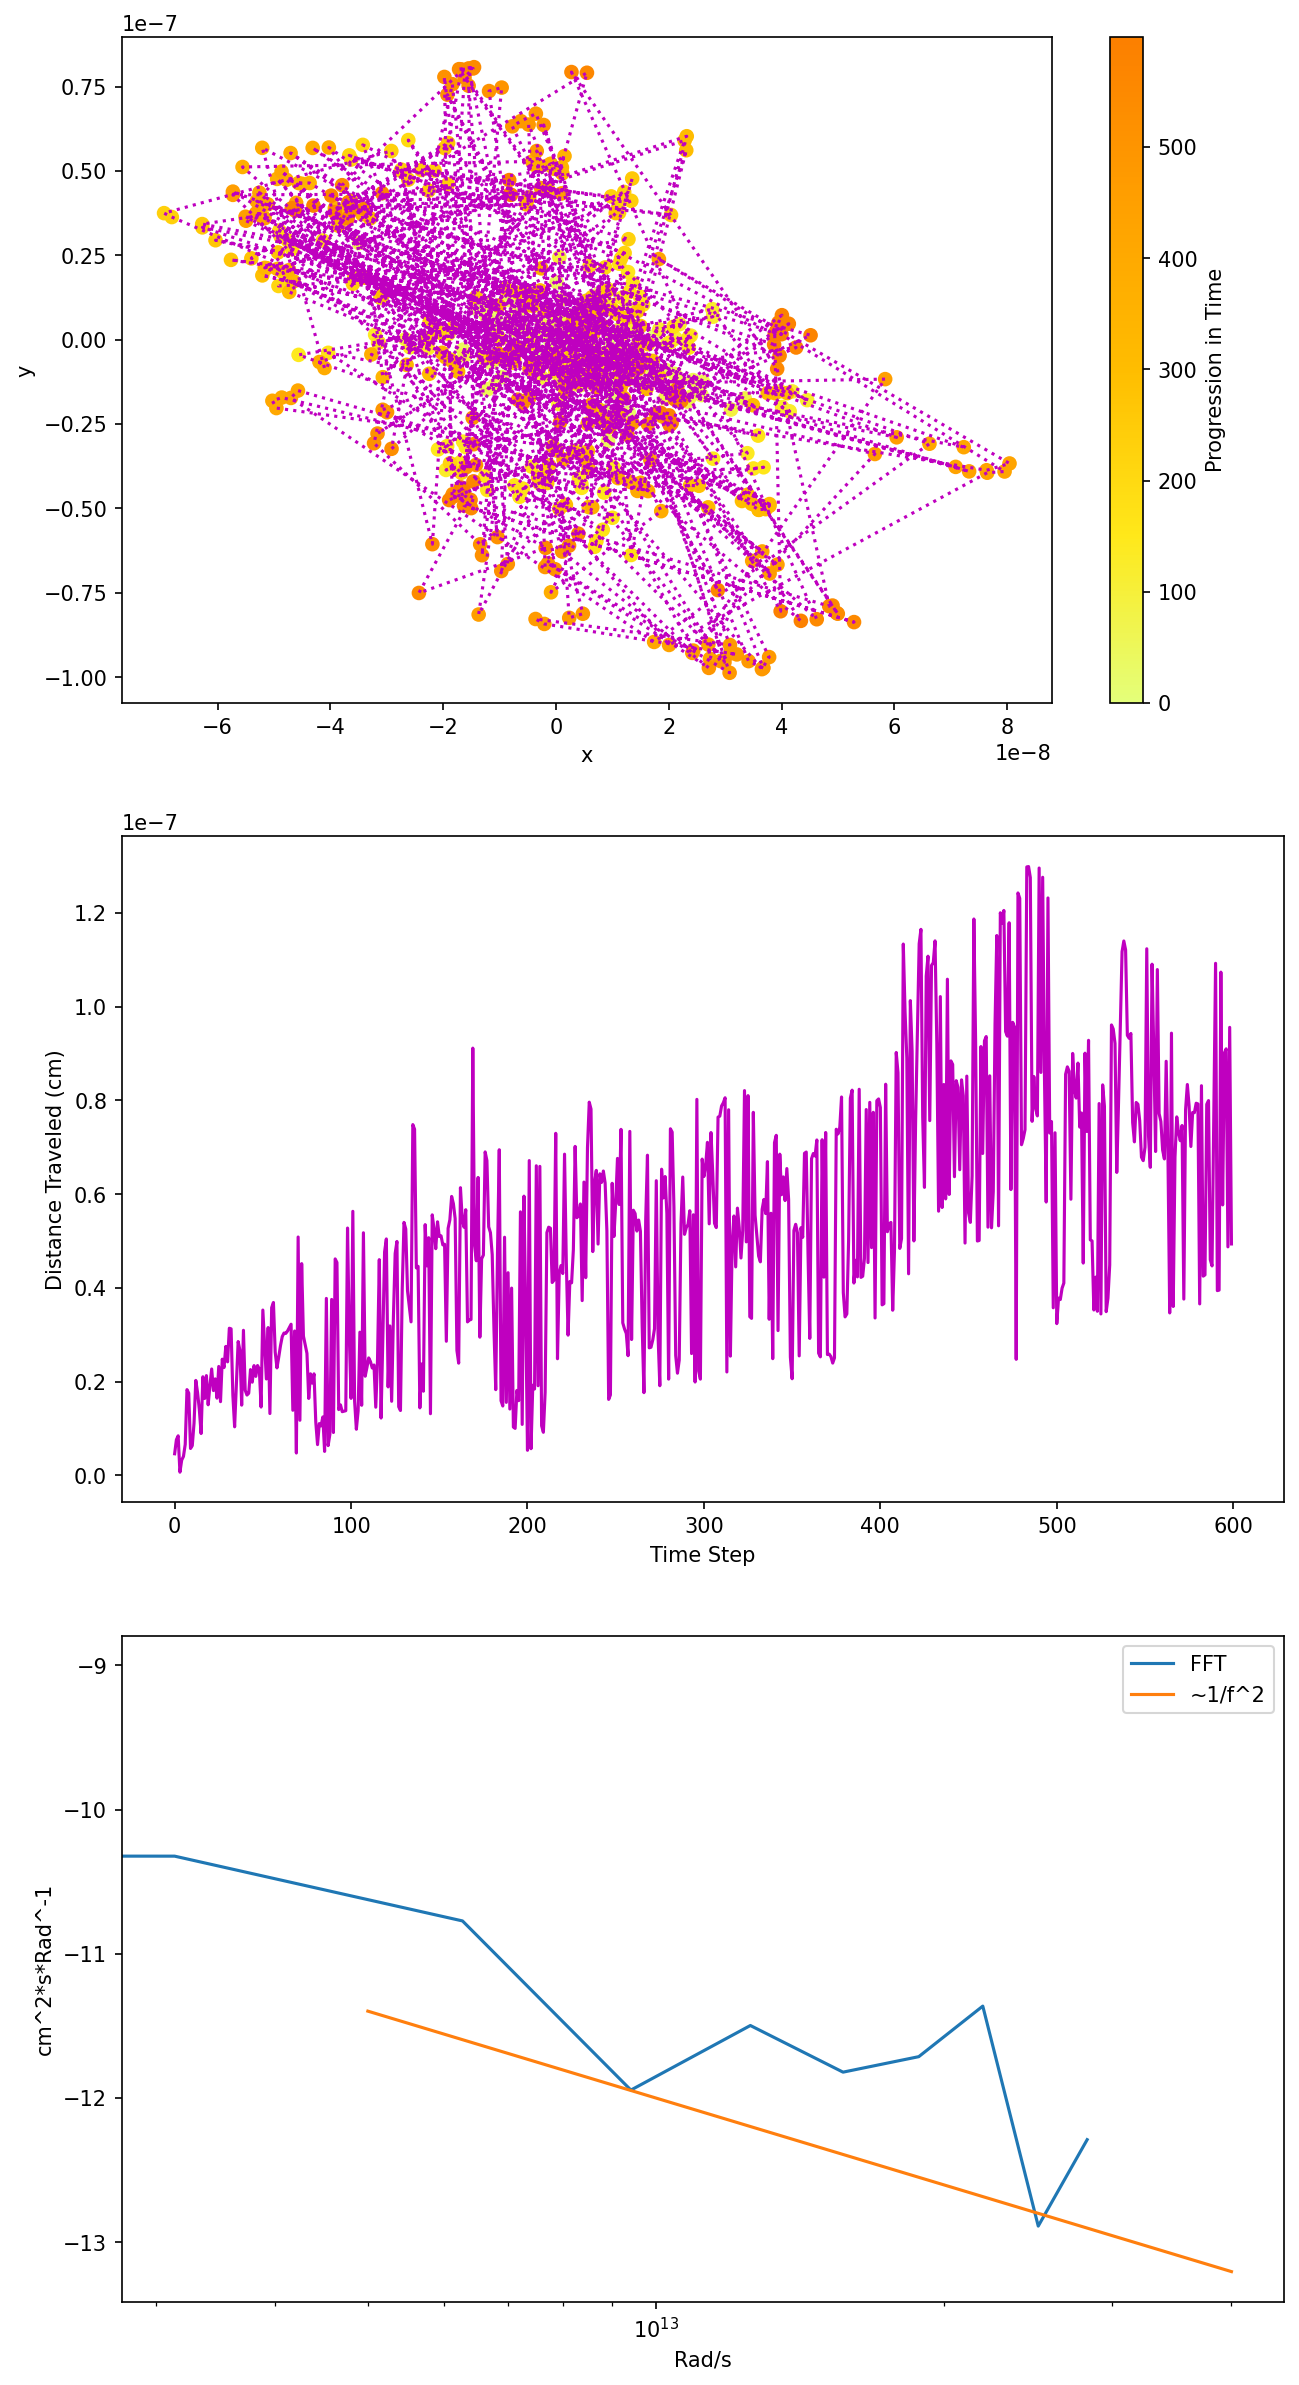

In [45]:
plot_motion(700)

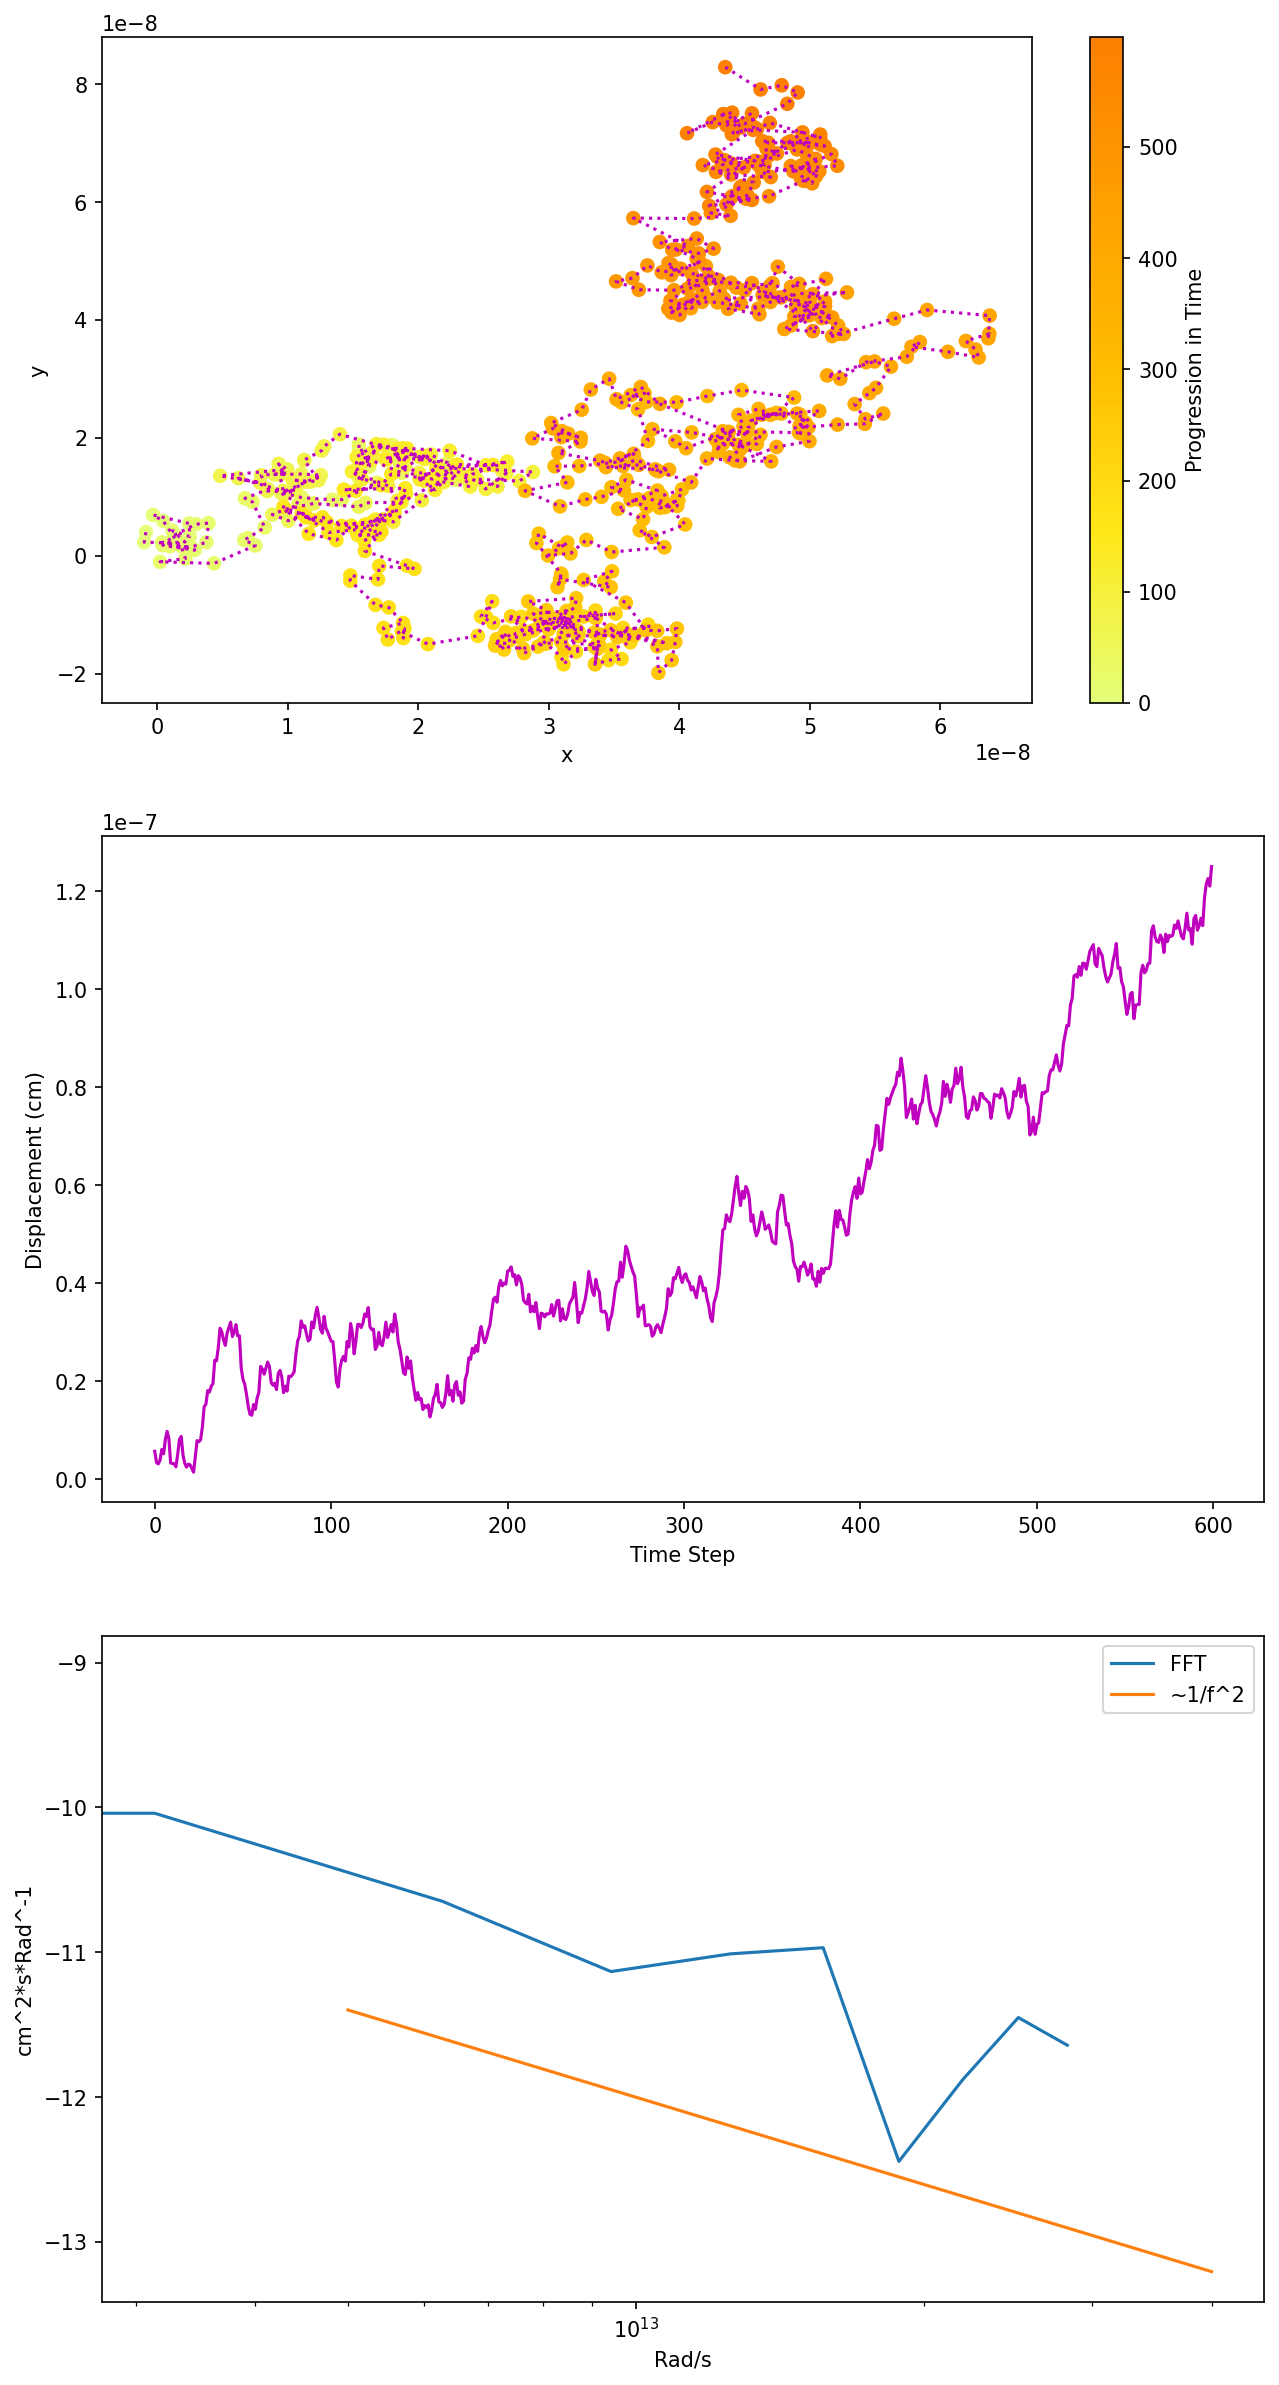

In [118]:
(x_id, y_id, z_id) = plot_id(45)

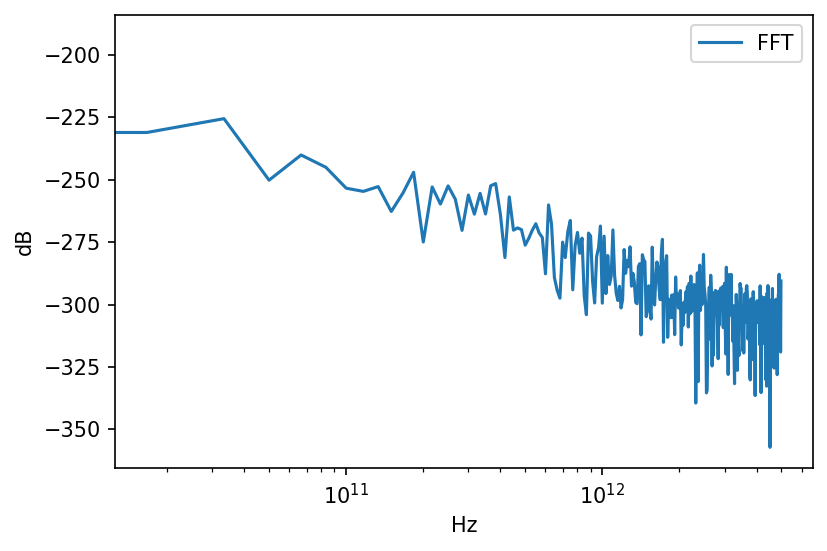

In [64]:
yf = fft(dist1) # 2nd arg is length of the transformed axis of the output
N = 600
# sample spacing
T = 1e-13 
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 20*np.log10(np.abs(yf[0:N//2])**2), label = 'FFT')
# x = np.linspace(1e11,4e13,100)
# plt.plot(x, 20*np.log10((1/x**2)), label = '~1/f^2')
plt.xscale('log')
plt.xlabel('Hz')
plt.ylabel('dB')
plt.legend()
plt.show()

In [68]:
x_data.shape

(600, 1000)

In [96]:
# Dx_all = x_data[:,:]
# Dy_all = y_data[:,:]
# Dz_all = z_data[:,:]
Dx_sum = np.sum(x_data, axis=1)
Dy_sum = np.sum(y_data, axis=1)
Dz_sum = np.sum(z_data, axis=1)
dist_all = np.sqrt((np.square(Dx_sum))+(np.square(Dy_sum))+(np.square(Dz_sum)))
dist_ave = dist_all/1000
dist_ave.shape

(600,)

Text(0, 0.5, 'Distance Traveled (cm)')

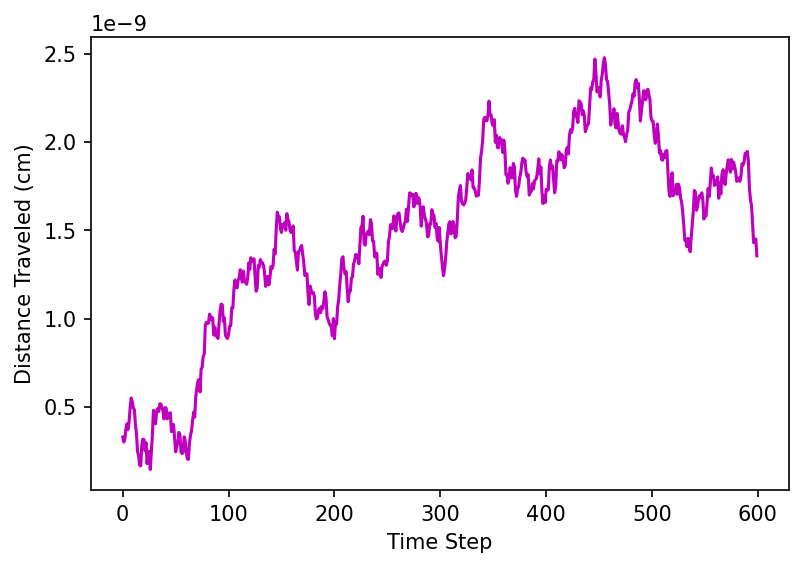

In [75]:
#plt.rcParams['figure.dpi'] = 150
line = plt.plot(t_step, dist_ave, '-', c = 'm')
plt.xlabel('Time Step')
plt.ylabel('Distance Traveled (cm)')
#plt.grid()
# x = np.linspace(0,600,100)
# plt.plot(x, np.log(x**(3/2)), label = '~3/2') #20*np.log10

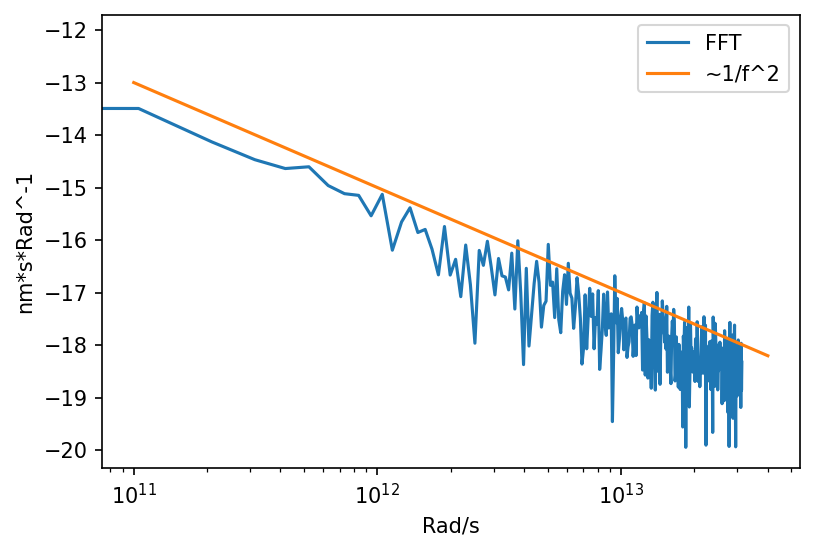

(600,)
(300,)


In [111]:
plt.rcParams['figure.dpi'] = 150
yf = fft(dist_ave) # 2nd arg is length of the transformed axis of the output
N = 600
# sample spacing
T = 1e-13 
xf = fftfreq(N, T)[:N//2]*6.28 #?? Hz to Rad/s
plt.plot(xf,np.log10(np.abs(yf[0:N//2])**2), label = 'FFT') #20*np.log10
x = np.linspace(1e11,4e13,100)
plt.plot(x, np.log10(1/(x**2))+9, label = '~1/f^2') #20*np.log10
plt.xscale('log')
plt.xlabel('Rad/s')
plt.ylabel('nm*s*Rad^-1')
plt.legend()
plt.show()
print(yf.shape)
print(xf.shape)

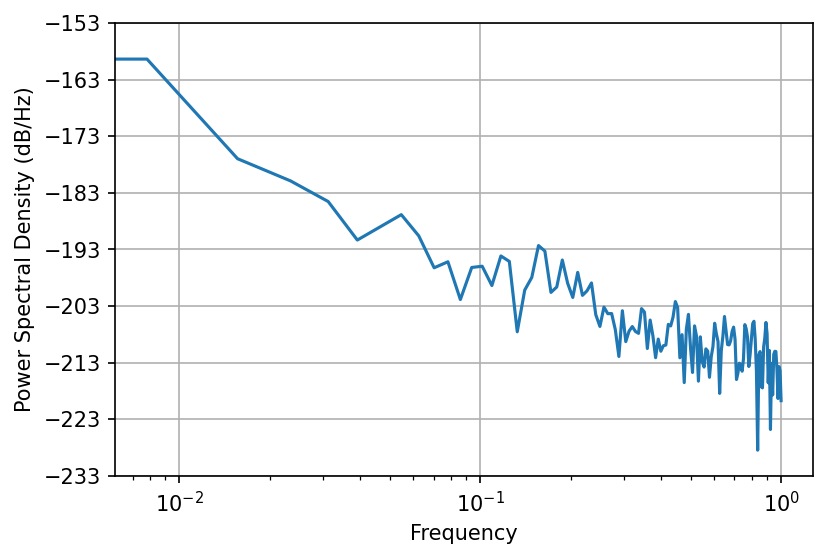

In [112]:
plt.psd(dist_ave,256)
plt.xscale('log')


In [338]:
def plot_3d(particle):
    fig=plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot3D(x_data[:,(particle-1),1], y_data[:,(particle-1),1], z_data[:,(particle-1),1],  ':', c = 'm',
             linewidth = 1)
    p = ax.scatter3D( x_data[:,(particle-1),1],  y_data[:,(particle-1),1], z_data[:,(particle-1),1], s = 15,
                        c = t_step, cmap = 'Wistia');

In [ ]:
ax.view_init(60, 35) #rotates plot
fig

In [117]:
def plot_id(particle):
    i = 0
    ts = len(t_step)
    x_id = np.zeros((ts,2))
    y_id = np.zeros((ts,2)) 
    z_id = np.zeros((ts,2))
    ID = p_id[0,particle-1]
    while i < len(p_id):
        id_index = np.where(p_id[i,:] == ID)
        x_id[i,0] = x_data[i, int(id_index[0])]
        y_id[i,0] = y_data[i, int(id_index[0])]
        z_id[i,0] = z_data[i, int(id_index[0])]
        x_id[i,1] = int(id_index[0])
        y_id[i,1] = int(id_index[0])
        z_id[i,1] = int(id_index[0])
        i=i+1   
    fig=plt.figure(figsize=(10,20))
    plt.subplot(3, 1, 1)
    scat = plt.scatter( x_id[:,0], y_id[:,0], c=t_step, cmap= 'Wistia')
    line = plt.plot(x_id[:,0], y_id[:,0], ':', c = 'm')
    plt.colorbar(label="Progression in Time", orientation="vertical")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(3, 1, 2)
    Dx = x_id[:,0]
    Dy = y_id[:,0]
    Dz = y_id[:,0]
    dist = np.sqrt((Dx**2)+(Dy**2)+(Dz**2))
    line = plt.plot(t_step, dist, '-', c = 'm')
    plt.xlabel('Time Step')
    plt.ylabel('Displacement (cm)')
    plt.subplot(3, 1, 3)
    plt.rcParams['figure.dpi'] = 100
    yf = fft(dist) # 2nd arg is length of the transformed axis of the output
    N = 20
    # sample spacing
    T = 1e-13 
    xf = fftfreq(N, T)[:N//2]*6.28
    plt.plot(xf, np.log10(np.abs(yf[0:N//2])**2), label = 'FFT')
    x = np.linspace(5e12,4e13,100)
    plt.plot(x, np.log10((1/x**2))+14, label = '~1/f^2')
    plt.xscale('log')
    plt.xlabel('Rad/s')
    plt.ylabel('cm^2*s*Rad^-1')
    plt.legend()
    plt.show()
    return x_id, y_id, z_id

In [139]:
def fft_ave():
    i = 0
    yf = np.zeros((len(t_step),1000))
    N = 600
    T = 1e-13 
    xf = fftfreq(N, T)[:N//2]*6.28
    while i < 1000:
        Dx = x_data[:,i]
        Dy = y_data[:,i]
        Dz = z_data[:,i]
        dist = np.sqrt((Dx**2)+(Dy**2)+(Dz**2))
        yf[:,i] = fft(dist)
        i = i+1
    
    yf_ave = np.average(yf, axis = 0)
    plt.plot(xf, np.log10(np.abs(yf_ave[0:N//2])**2), label = 'FFT')
    x = np.linspace(5e12,4e13,100)
    plt.plot(x, np.log10((1/x**2))+14, label = '~1/f^2')
    plt.xscale('log')
    plt.xlabel('Rad/s')
    plt.ylabel('cm^2*s*Rad^-1')
    plt.legend()
    plt.show()
    print(dist.shape)
    print(yf.shape)
    print(yf_ave.shape)
    print(xf.shape)

/tmp/ipykernel_6605/2498795100.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  yf[:,i] = fft(dist)


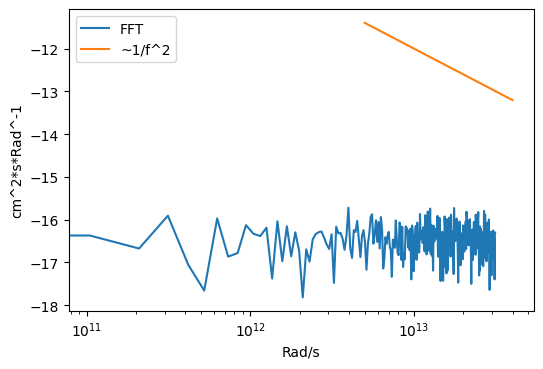

(600,)
(600, 1000)
(1000,)
(300,)


In [140]:
fft_ave()